In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
!pip install -Uqq fastbook

     |████████████████████████████████| 719 kB 5.2 MB/s 
     |████████████████████████████████| 4.9 MB 46.6 MB/s 
     |████████████████████████████████| 1.3 MB 53.1 MB/s 
     |████████████████████████████████| 431 kB 31.1 MB/s 
     |████████████████████████████████| 212 kB 51.6 MB/s 
     |████████████████████████████████| 163 kB 73.4 MB/s 
     |████████████████████████████████| 115 kB 52.7 MB/s 
     |████████████████████████████████| 127 kB 61.0 MB/s 
     |████████████████████████████████| 6.6 MB 46.7 MB/s 


In [5]:
from fastbook import *
from fastai.vision.widgets import *

In [8]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [10]:
path = Path('/content/gdrive/MyDrive/emotion-detection/data/train')

In [11]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from transformers import AutoFeatureExtractor, AutoModelForImageClassification
extractor = AutoFeatureExtractor.from_pretrained("google/vit-base-patch16-224")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [9]:
fns = get_image_files(path)
fns

(#28709) [Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3694.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3695.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3696.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3697.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3698.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3699.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im37.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im370.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3700.png'),Path('/content/gdrive/MyDrive/emotion-detection/data/train/angry/im3701.png')...]

In [13]:
pic=DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224))

In [14]:
dls = pic.dataloaders(path)

In [15]:
train_ds = dls.train_ds.items[:-1]
val_ds = dls.valid_ds.items[:-1]

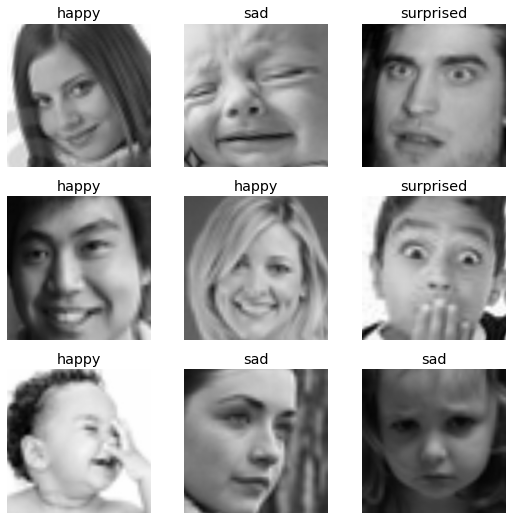

In [16]:
dls.show_batch()

In [17]:
!pip install huggingface_hub["fastai"]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
learn = cnn_learner(dls, models.alexnet, metrics=error_rate)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be

  0%|          | 0.00/233M [00:00<?, ?B/s]

In [19]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.843396,1.488820,0.554433,1:11:43


epoch,train_loss,valid_loss,error_rate,time
0,1.403841,1.278281,0.477443,42:26
1,1.225788,1.137712,0.433548,42:35
2,1.121917,1.071290,0.404285,42:24
3,1.066848,1.054147,0.394879,42:54


In [20]:
interp = Interpretation.from_learner(learn)

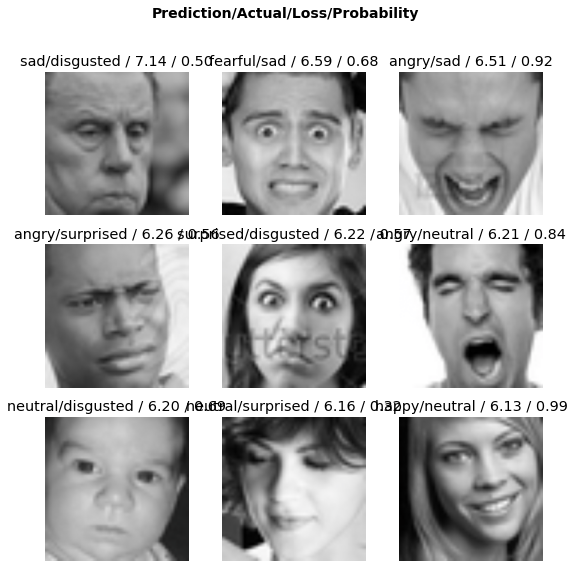

In [21]:
interp.plot_top_losses(9)

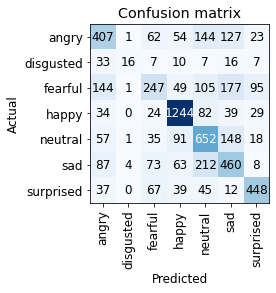

In [22]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
learn.export("alexnet.pkl")